In [45]:
# Import our dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import sklearn as skl
import tensorflow as tf

In [ ]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
## NORMALIZE DATA
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
# Add our first Dense layer, including the input layer

# NOTE:
# input_dim parameter: # of inputs in model
# units parameter: # of neurons in hidden layer
# activation parameter: which activation function to use. 
    # We'll use ReLU activation function to allow our hidden layer to ID and train on nonlinear relationships in dataset.
    
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

## 19.2.3 - train & test basic neural netwk

In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 4s 927us/step - loss: 0.6738 - accuracy: 0.5067
Epoch 2/100
24/24 [==============================] - 0s 845us/step - loss: 0.6686 - accuracy: 0.7320
Epoch 3/100
24/24 [==============================] - 0s 910us/step - loss: 0.6627 - accuracy: 0.8387
Epoch 4/100
24/24 [==============================] - 0s 889us/step - loss: 0.6558 - accuracy: 0.8493
Epoch 5/100
24/24 [==============================] - 0s 953us/step - loss: 0.6478 - accuracy: 0.8573
Epoch 6/100
24/24 [==============================] - 0s 917us/step - loss: 0.6390 - accuracy: 0.8627
Epoch 7/100
24/24 [==============================] - 0s 948us/step - loss: 0.6293 - accuracy: 0.8733
Epoch 8/100
24/24 [==============================] - 0s 903us/step - loss: 0.6188 - accuracy: 0.8867
Epoch 9/100
24/24 [==============================] - 0s 994us/step - loss: 0.6075 - accuracy: 0.8987
Epoch 10/100
24/24 [==============================] - 0s 879us/step - loss: 0.5957 - accura

<AxesSubplot:>

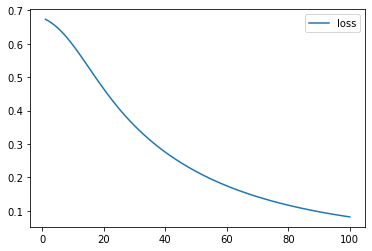

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

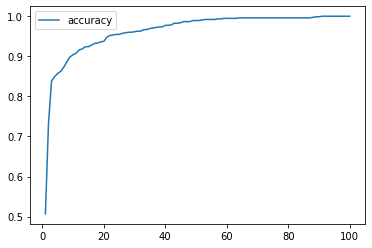

In [12]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 4s - loss: 0.0819 - accuracy: 1.0000 - 4s/epoch - 467ms/step
Loss: 0.08187930285930634, Accuracy: 1.0


In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

## 19.2.4 - Nuances of neural netwks on nonlinear #'s

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

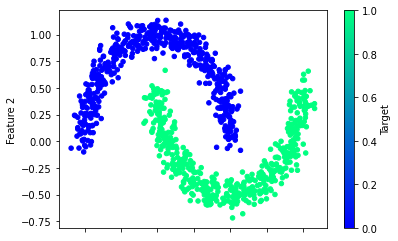

In [15]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [16]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [17]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 2ms/step - loss: 1.1937 - accuracy: 0.4160
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 1.0688 - accuracy: 0.4387
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9812 - accuracy: 0.4573
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9219 - accuracy: 0.4747
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8761 - accuracy: 0.4840
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8380 - accuracy: 0.4920
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8053 - accuracy: 0.5040
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7770 - accuracy: 0.5147
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7517 - accuracy: 0.5293
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7288 - accuracy: 0.5360
Epoch 11/

Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3045 - accuracy: 0.8547
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3027 - accuracy: 0.8573
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3011 - accuracy: 0.8573
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2996 - accuracy: 0.8613
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2980 - accuracy: 0.8640
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2965 - accuracy: 0.8640
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2951 - accuracy: 0.8640
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2937 - accuracy: 0.8667
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2924 - accuracy: 0.8680
Epoch 92/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2910 - accuracy: 0.8680


<AxesSubplot:>

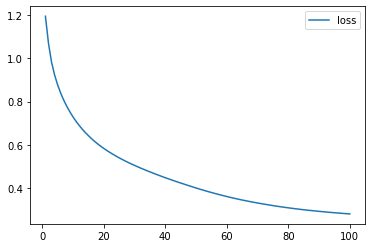

In [18]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

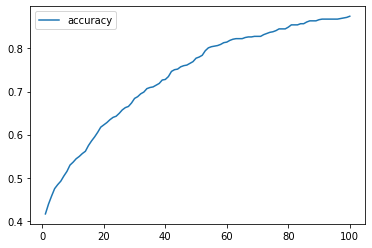

In [19]:
# Plot the accuracy
history_df.plot(y="accuracy")

## 19.2.5 - create multiple neuron neural netwk

In [20]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [21]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

### NOTE on # hidden nodes: good rule of thumb for basic neural network is to have 2-3x # of neurons 
# in hidden layer as the number of inputs. ###

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [22]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5881 - accuracy: 0.4920
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5532 - accuracy: 0.7040
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5235 - accuracy: 0.7573
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4976 - accuracy: 0.7867
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4747 - accuracy: 0.8307
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4549 - accuracy: 0.8533
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4371 - accuracy: 0.8627
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4216 - accuracy: 0.8627
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4074 - accuracy: 0.8627
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3946 - accuracy: 0.8640
Epoch 11/

## 19.2.6 - Give model synaptic boost

In [ ]:
### MEANS OF OPTIMIZING NEURAL NETWK ###
# Check input dataset.
# Add more neurons to hidden layer.*
# Add additional hidden layers.*
# Use different activation function for hidden layers.
# Add additional epochs to training regimen.
# *This concept of a multiple-layered neural network is known as "deep learning neural network."

###  FUNCTIONS ###
# The sigmoid function values are normalized to a probability between 0 and 1, which is ideal for binary classification.
# The tanh function can be used for classification or regression, and it expands the range between -1 and 1.
# The ReLU function is ideal for looking at positive nonlinear input data for classification or regression.
# The Leaky ReLU function is a good alternative for nonlinear input data with many negative inputs.

## 19.3.3 - Practice encoding categorical variables

In [23]:
# Read in our ramen data
ramen_df = pd.read_csv("resources/ramen-ratings.csv")

# Print out the Country value counts
country_counts = ramen_df.Country.value_counts()
country_counts

Japan            352
USA              323
South Korea      309
Taiwan           224
Thailand         191
China            169
Malaysia         156
Hong Kong        137
Indonesia        126
Singapore        109
Vietnam          108
UK                69
Philippines       47
Canada            41
India             31
Germany           27
Mexico            25
Australia         22
Netherlands       15
Myanmar           14
Nepal             14
Pakistan           9
Hungary            9
Bangladesh         7
Colombia           6
Brazil             5
Cambodia           5
Fiji               4
Holland            4
Poland             4
Finland            3
Sarawak            3
Sweden             3
Dubai              3
Ghana              2
Estonia            2
Nigeria            1
United States      1
Name: Country, dtype: int64

<AxesSubplot:ylabel='Density'>

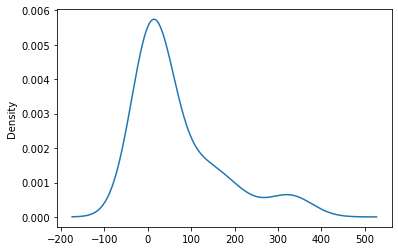

In [24]:
# Visualize the value counts 
# (determine which countries are uncommon enough to bucket into "other" category)
country_counts.plot.density()

In [25]:
# Determine which values to replace
replace_countries = list(country_counts[country_counts < 100].index)

# Replace in DataFrame
for country in replace_countries:
    ramen_df.Country = ramen_df.Country.replace(country,"Other")


# Check to make sure binning was successful
ramen_df.Country.value_counts()

Other          376
Japan          352
USA            323
South Korea    309
Taiwan         224
Thailand       191
China          169
Malaysia       156
Hong Kong      137
Indonesia      126
Singapore      109
Vietnam        108
Name: Country, dtype: int64

In [26]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(ramen_df.Country.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['Country'])
encode_df.head()

,Country_China,Country_Hong Kong,Country_Indonesia,Country_Japan,Country_Malaysia,Country_Other,Country_Singapore,Country_South Korea,Country_Taiwan,Country_Thailand,Country_USA,Country_Vietnam
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# Merge the two DataFrames together and drop the Country column
ramen_df.merge(encode_df,left_index=True,right_index=True).drop("Country",1)

C:\Users\SMONG\AppData\Local\Temp/ipykernel_5072/3440917920.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  ramen_df.merge(encode_df,left_index=True,right_index=True).drop("Country",1)


,Review #,Brand,Variety,Style,Stars,Top Ten,Country_China,Country_Hong Kong,Country_Indonesia,Country_Japan,Country_Malaysia,Country_Other,Country_Singapore,Country_South Korea,Country_Taiwan,Country_Thailand,Country_USA,Country_Vietnam
0,2580,New Touch,T's Restaurant Tantanmen,Cup,3.75,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,2.25,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,2.75,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2576,Ching's Secret,Singapore Curry,Pack,3.75,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,3.5,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2577,3,Wai Wai,Tom Yum Shrimp,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## 19.3.4- Span gap using std'ization

In [29]:
# Read in our dataset
hr_df = pd.read_csv("resources/hr_dataset.csv")
hr_df.head()

,Satisfaction_Level,Num_Projects,Time_Spent,Num_Promotions
0,0.30,1,253,2
1,0.25,1,200,0
2,0.90,4,2880,5
3,0.65,3,1450,3
4,0.50,2,785,2


In [30]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [31]:
# Fit the StandardScaler
scaler.fit(hr_df)

StandardScaler()

In [32]:
# Scale the data
scaled_data = scaler.transform(hr_df)

In [33]:
# Create a DataFrame with the scaled data
transformed_scaled_data = pd.DataFrame(scaled_data, columns=hr_df.columns)
transformed_scaled_data.head()

,Satisfaction_Level,Num_Projects,Time_Spent,Num_Promotions
0,-1.303615,-1.162476,-1.049481,-0.558656
1,-1.512945,-1.162476,-1.094603,-1.804887
2,1.208335,0.860233,1.187080,1.310692
3,0.161689,0.185996,-0.030385,0.064460
4,-0.466299,-0.488240,-0.596549,-0.558656


## 19.4.2 - Deep learning: Tabular (using real data)

In [2]:
# Import our input dataset
attrition_df = pd.read_csv('resources/HR-Employee-Attrition.csv')
attrition_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# Generate our categorical variable list
attrition_cat = attrition_df.dtypes[attrition_df.dtypes == "object"].index.tolist()
attrition_cat

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

## 19.4.3- preprocessing (real data)

In [5]:
# Check the number of unique values in each column
attrition_df[attrition_cat].nunique()

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

In [6]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(attrition_df[attrition_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(attrition_cat)
encode_df.head()

,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [7]:
# Merge one-hot encoded features and drop the originals
attrition_df = attrition_df.merge(encode_df,left_index=True, right_index=True)
attrition_df = attrition_df.drop(attrition_cat,1)
attrition_df.head()

C:\Users\SMONG\AppData\Local\Temp/ipykernel_13324/1667322014.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  attrition_df = attrition_df.drop(attrition_cat,1)


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,49,279,8,1,1,2,3,61,2,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,37,1373,2,2,1,4,4,92,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,33,1392,3,4,1,5,4,56,3,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,27,591,2,1,1,7,1,40,3,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [8]:
# Split our preprocessed data into our features and target arrays
y = attrition_df["Attrition_Yes"].values
X = attrition_df.drop(["Attrition_Yes","Attrition_No"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

C:\Users\SMONG\AppData\Local\Temp/ipykernel_13324/3972905584.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = attrition_df.drop(["Attrition_Yes","Attrition_No"],1).values


In [9]:
### Normalize data ###
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## 19.4.4- Deep learning model design (real data)

In [10]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 448       
                                                                 
 dense_1 (Dense)             (None, 5)                 45        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 499
Trainable params: 499
Non-trainable params: 0
_________________________________________________________________


# ### 19.6- checkpoints (using real data from 19.4) ###

In [46]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [47]:
### SAVE MODEL CHECKPTS (/ CREATE EFFECTIVE CHECKPT CALLBACK) USING MODELCHECKPOINT METHOD ###

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch')

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
800/854 [===========================>..] - ETA: 0s - loss: 0.3625 - accuracy: 0.8532
Epoch 1: saving model to checkpoints\weights.01.hdf5
854/854 [==============================] - 1s 957us/step - loss: 0.3631 - accuracy: 0.8525
Epoch 2/100
828/854 [============================>.] - ETA: 0s - loss: 0.3617 - accuracy: 0.8525
Epoch 2: saving model to checkpoints\weights.02.hdf5
854/854 [==============================] - 1s 1ms/step - loss: 0.3625 - accuracy: 0.8521
Epoch 3/100
820/854 [===========================>..] - ETA: 0s - loss: 0.3613 - accuracy: 0.8527
Epoch 3: saving model to checkpoints\weights.03.hdf5
854/854 [==============================] - 1s 901us/step - loss: 0.3621 - accuracy: 0.8524
Epoch 4/100
819/854 [===========================>..] - ETA: 0s - loss: 0.3624 - accuracy: 0.8521
Epoch 4: saving model to checkpoints\weights.04.hdf5
854/854 [==============================] - 1s 1ms/step - loss: 0.3619 - accuracy: 0.8521
Epoch 5/100
823/854 [===================

Epoch 35/100
811/854 [===========================>..] - ETA: 0s - loss: 0.3567 - accuracy: 0.8533
Epoch 35: saving model to checkpoints\weights.35.hdf5
854/854 [==============================] - 1s 819us/step - loss: 0.3572 - accuracy: 0.8529
Epoch 36/100
823/854 [===========================>..] - ETA: 0s - loss: 0.3566 - accuracy: 0.8540
Epoch 36: saving model to checkpoints\weights.36.hdf5
854/854 [==============================] - 1s 1ms/step - loss: 0.3569 - accuracy: 0.8538
Epoch 37/100
825/854 [===========================>..] - ETA: 0s - loss: 0.3561 - accuracy: 0.8544
Epoch 37: saving model to checkpoints\weights.37.hdf5
854/854 [==============================] - 1s 895us/step - loss: 0.3573 - accuracy: 0.8536
Epoch 38/100
844/854 [============================>.] - ETA: 0s - loss: 0.3563 - accuracy: 0.8544
Epoch 38: saving model to checkpoints\weights.38.hdf5
854/854 [==============================] - 1s 1ms/step - loss: 0.3567 - accuracy: 0.8541
Epoch 39/100
829/854 [==========

Epoch 69/100
827/854 [============================>.] - ETA: 0s - loss: 0.3525 - accuracy: 0.8553
Epoch 69: saving model to checkpoints\weights.69.hdf5
854/854 [==============================] - 1s 810us/step - loss: 0.3538 - accuracy: 0.8542
Epoch 70/100
811/854 [===========================>..] - ETA: 0s - loss: 0.3535 - accuracy: 0.8548
Epoch 70: saving model to checkpoints\weights.70.hdf5
854/854 [==============================] - 1s 947us/step - loss: 0.3533 - accuracy: 0.8553
Epoch 71/100
826/854 [============================>.] - ETA: 0s - loss: 0.3546 - accuracy: 0.8548
Epoch 71: saving model to checkpoints\weights.71.hdf5
854/854 [==============================] - 1s 946us/step - loss: 0.3537 - accuracy: 0.8554
Epoch 72/100
829/854 [============================>.] - ETA: 0s - loss: 0.3537 - accuracy: 0.8551
Epoch 72: saving model to checkpoints\weights.72.hdf5
854/854 [==============================] - 1s 880us/step - loss: 0.3536 - accuracy: 0.8550
Epoch 73/100
828/854 [======

In [48]:
### RESTORE WEIGHTS USING CHECKPOINTS ###

# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5

nn_new = tf.keras.models.Sequential()

# First hidden layer
nn_new.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Restore the model weights
nn_new.load_weights("checkpoints/weights.100.hdf5")

# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

ValueError: Cannot assign value to variable ' dense_11/kernel:0': Shape mismatch.The variable shape (36, 8), and the assigned value shape (36, 24) are incompatible.

# 19.6.2 - Saving weights

In [49]:
# Export our model to HDF5 file
nn_new.save("trained_attrition.h5")

# ###

In [11]:
# NOTE on # params: 
# if 8 neurons in 1st layer, & 5 in the second layer:
    # 8x5=40 params. 
    # PLUS five params for bias terms
    # this gives us total of 45 params.

In [12]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

## 19.4.5- Train & eval model (real data)

In [13]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100)

Epoch 1/100
35/35 [==============================] - 0s 1ms/step - loss: 60.2192 - accuracy: 0.7704
Epoch 2/100
35/35 [==============================] - 0s 1ms/step - loss: 31.1945 - accuracy: 0.7668
Epoch 3/100
35/35 [==============================] - 0s 930us/step - loss: 16.7587 - accuracy: 0.7396
Epoch 4/100
35/35 [==============================] - 0s 943us/step - loss: 7.9014 - accuracy: 0.7241
Epoch 5/100
35/35 [==============================] - 0s 1ms/step - loss: 3.9092 - accuracy: 0.7069
Epoch 6/100
35/35 [==============================] - 0s 1ms/step - loss: 2.8043 - accuracy: 0.7260
Epoch 7/100
35/35 [==============================] - 0s 1ms/step - loss: 1.5535 - accuracy: 0.7241
Epoch 8/100
35/35 [==============================] - 0s 1ms/step - loss: 1.2623 - accuracy: 0.7260
Epoch 9/100
35/35 [==============================] - 0s 867us/step - loss: 1.8468 - accuracy: 0.7142
Epoch 10/100
35/35 [==============================] - 0s 1ms/step - loss: 2.2037 - accuracy: 0.7214


35/35 [==============================] - 0s 770us/step - loss: 0.5569 - accuracy: 0.8067
Epoch 83/100
35/35 [==============================] - 0s 692us/step - loss: 0.9546 - accuracy: 0.7704
Epoch 84/100
35/35 [==============================] - 0s 840us/step - loss: 1.0275 - accuracy: 0.7713
Epoch 85/100
35/35 [==============================] - 0s 712us/step - loss: 0.6858 - accuracy: 0.7677
Epoch 86/100
35/35 [==============================] - 0s 789us/step - loss: 0.6942 - accuracy: 0.7632
Epoch 87/100
35/35 [==============================] - 0s 711us/step - loss: 1.3280 - accuracy: 0.7359
Epoch 88/100
35/35 [==============================] - 0s 743us/step - loss: 1.1300 - accuracy: 0.7713
Epoch 89/100
35/35 [==============================] - 0s 784us/step - loss: 0.9302 - accuracy: 0.7659
Epoch 90/100
35/35 [==============================] - 0s 768us/step - loss: 0.8459 - accuracy: 0.7804
Epoch 91/100
35/35 [==============================] - 0s 786us/step - loss: 0.9745 - accuracy: 

In [14]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

12/12 - 0s - loss: 0.3883 - accuracy: 0.8723 - 114ms/epoch - 9ms/step
Loss: 0.3882959187030792, Accuracy: 0.8722826242446899


## 19.5.2- Logistic regression vs basic neural netwk

In [15]:
# logistic regression: A statistical model that mathematically determines its probability of belonging to one of two groups
# probability between 0 & 1
# basic neural network using sigmoid activation func is effectively a logistic regression model:

In [17]:
# Import our input dataset
diabetes_df = pd.read_csv('resources/diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
# Remove diabetes outcome target from features data
y = diabetes_df.Outcome
X = diabetes_df.drop(columns="Outcome")

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [19]:
# Preprocess numerical data for neural network (std'ize numerical data)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [20]:
# Define the LOGISTIC REGRESSION model
log_classifier = LogisticRegression(solver="lbfgs",max_iter=200)

# Train the model
log_classifier.fit(X_train,y_train)

# Evaluate the model
y_pred = log_classifier.predict(X_test)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Logistic regression model accuracy: 0.729


In [21]:
# Define the BASIC NEURAL NETWK model
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu", input_dim=8))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
18/18 [==============================] - 0s 919us/step - loss: 0.8454 - accuracy: 0.3385
Epoch 2/50
18/18 [==============================] - 0s 451us/step - loss: 0.7934 - accuracy: 0.3576
Epoch 3/50
18/18 [==============================] - 0s 1ms/step - loss: 0.7499 - accuracy: 0.4045
Epoch 4/50
18/18 [==============================] - 0s 1ms/step - loss: 0.7133 - accuracy: 0.4844
Epoch 5/50
18/18 [==============================] - 0s 1ms/step - loss: 0.6805 - accuracy: 0.5972
Epoch 6/50
18/18 [==============================] - 0s 1ms/step - loss: 0.6518 - accuracy: 0.6562
Epoch 7/50
18/18 [==============================] - 0s 965us/step - loss: 0.6251 - accuracy: 0.6997
Epoch 8/50
18/18 [==============================] - 0s 983us/step - loss: 0.6018 - accuracy: 0.7135
Epoch 9/50
18/18 [==============================] - 0s 1ms/step - loss: 0.5802 - accuracy: 0.7309
Epoch 10/50
18/18 [==============================] - 0s 1ms/step - loss: 0.5622 - accuracy: 0.7361
Epoch 11/50

## 19.5.3- Support vector machine (SVM) vs Deep learning model

In [23]:
# SVM: supervised learning models that analyze data used for regression and classification.
# binary classifier using geometric boundaries to distinguish data points from two separate groups

In [24]:
# Import our input dataset
tele_df = pd.read_csv('resources/bank_telemarketing.csv')
tele_df.head()

,Age,Job,Marital_Status,Education,Default_Credit,Housing_Loan,Personal_Loan,Subscribed
0,56,other,married,Primary_Education,no,no,no,no
1,37,services,married,Secondary_Education,no,yes,no,no
2,40,admin,married,Primary_Education,no,no,no,no
3,56,services,married,Secondary_Education,no,no,yes,no
4,59,admin,married,Professional_Education,no,no,no,no


In [25]:
# Generate our categorical variable list
tele_cat = tele_df.dtypes[tele_df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
tele_df[tele_cat].nunique()

Job               9
Marital_Status    3
Education         4
Default_Credit    2
Housing_Loan      2
Personal_Loan     2
Subscribed        2
dtype: int64

In [26]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(tele_df[tele_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(tele_cat)
encode_df.head()

,Job_admin,Job_blue-collar,Job_entrepreneur,Job_management,Job_other,Job_retired,Job_self-employed,Job_services,Job_technician,Marital_Status_divorced,...,Education_Secondary_Education,Education_Tertiary_Education,Default_Credit_no,Default_Credit_yes,Housing_Loan_no,Housing_Loan_yes,Personal_Loan_no,Personal_Loan_yes,Subscribed_no,Subscribed_yes
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [27]:
# Merge one-hot encoded features and drop the originals
tele_df = tele_df.merge(encode_df,left_index=True, right_index=True)
tele_df = tele_df.drop(tele_cat,1)
tele_df.head()

C:\Users\SMONG\AppData\Local\Temp/ipykernel_13324/2291554867.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  tele_df = tele_df.drop(tele_cat,1)


,Age,Job_admin,Job_blue-collar,Job_entrepreneur,Job_management,Job_other,Job_retired,Job_self-employed,Job_services,Job_technician,...,Education_Secondary_Education,Education_Tertiary_Education,Default_Credit_no,Default_Credit_yes,Housing_Loan_no,Housing_Loan_yes,Personal_Loan_no,Personal_Loan_yes,Subscribed_no,Subscribed_yes
0,56,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,40,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,59,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [28]:
# Remove loan status target from features data
y = tele_df.Subscribed_yes.values
X = tele_df.drop(columns=["Subscribed_no","Subscribed_yes"]).values

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [29]:
# Create the SVM model
svm = SVC(kernel='linear')

In [30]:
# Train the model
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [31]:
# Evaluate the model
y_pred = svm.predict(X_test_scaled)
print(f" SVM model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 SVM model accuracy: 0.873


In [32]:
# Define the model - DEEP NEURAL NETWK
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 10
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [33]:
# Train the model 
fit_model = nn.fit(X_train_scaled, y_train, epochs=50) 
# Evaluate the model using the test data 
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
715/715 [==============================] - 1s 796us/step - loss: 0.3911 - accuracy: 0.8735
Epoch 2/50
715/715 [==============================] - 1s 933us/step - loss: 0.3717 - accuracy: 0.8735
Epoch 3/50
715/715 [==============================] - 1s 886us/step - loss: 0.3698 - accuracy: 0.8735
Epoch 4/50
715/715 [==============================] - 1s 868us/step - loss: 0.3688 - accuracy: 0.8735
Epoch 5/50
715/715 [==============================] - 1s 1ms/step - loss: 0.3678 - accuracy: 0.8735
Epoch 6/50
715/715 [==============================] - 1s 909us/step - loss: 0.3672 - accuracy: 0.8735
Epoch 7/50
715/715 [==============================] - 1s 1ms/step - loss: 0.3666 - accuracy: 0.8735
Epoch 8/50
715/715 [==============================] - 1s 1ms/step - loss: 0.3662 - accuracy: 0.8735
Epoch 9/50
715/715 [==============================] - 1s 1ms/step - loss: 0.3661 - accuracy: 0.8735
Epoch 10/50
715/715 [==============================] - 1s 1ms/step - loss: 0.3658 - accura

## 19.5.4- Random forest vs Deep learning model

In [35]:
# random forest: supervised ensemble learning model that combines decision trees to analyze input data.
# only handle tabular data

In [37]:
# Import our input dataset
loans_df = pd.read_csv('resources/loan_status.csv')
loans_df.head()

,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,Fully_Paid,99999999,Short_Term,741.0,2231892.0,8_years,Own_Home,Debt_Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
1,Fully_Paid,217646,Short_Term,730.0,1184194.0,<_1_year,Home_Mortgage,Debt_Consolidation,10855.08,19.6,10.0,13,1,122170,272052.0,1.0,0.0
2,Fully_Paid,548746,Short_Term,678.0,2559110.0,2_years,Rent,Debt_Consolidation,18660.28,22.6,33.0,4,0,437171,555038.0,0.0,0.0
3,Fully_Paid,99999999,Short_Term,728.0,714628.0,3_years,Rent,Debt_Consolidation,11851.06,16.0,76.0,16,0,203965,289784.0,0.0,0.0
4,Fully_Paid,99999999,Short_Term,740.0,776188.0,<_1_year,Own_Home,Debt_Consolidation,11578.22,8.5,25.0,6,0,134083,220220.0,0.0,0.0


In [38]:
### Preprocessing
# Generate our categorical variable list
loans_cat = loans_df.dtypes[loans_df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
loans_df[loans_cat].nunique()

Loan_Status              2
Term                     2
Years_in_current_job    11
Home_Ownership           4
Purpose                  7
dtype: int64

In [39]:
# Check the unique value counts to see if binning is required
loans_df.Years_in_current_job.value_counts()

10+_years    13149
2_years       3225
3_years       2997
<_1_year      2699
5_years       2487
4_years       2286
1_year        2247
6_years       2109
7_years       2082
8_years       1675
9_years       1467
Name: Years_in_current_job, dtype: int64

In [40]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(loans_df[loans_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(loans_cat)
encode_df.head()

,Loan_Status_Fully_Paid,Loan_Status_Not_Paid,Term_Long_Term,Term_Short_Term,Years_in_current_job_10+_years,Years_in_current_job_1_year,Years_in_current_job_2_years,Years_in_current_job_3_years,Years_in_current_job_4_years,Years_in_current_job_5_years,...,Home_Ownership_Home_Mortgage,Home_Ownership_Own_Home,Home_Ownership_Rent,Purpose_Business_Loan,Purpose_Buy_House,Purpose_Buy_a_Car,Purpose_Debt_Consolidation,Purpose_Home_Improvements,Purpose_Medical_Bills,Purpose_Other
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [41]:
# Merge one-hot encoded features and drop the originals
loans_df = loans_df.merge(encode_df,left_index=True, right_index=True)
loans_df = loans_df.drop(loans_cat,1)
loans_df.head()

C:\Users\SMONG\AppData\Local\Temp/ipykernel_13324/1908271011.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  loans_df = loans_df.drop(loans_cat,1)


,Current_Loan_Amount,Credit_Score,Annual_Income,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,...,Home_Ownership_Home_Mortgage,Home_Ownership_Own_Home,Home_Ownership_Rent,Purpose_Business_Loan,Purpose_Buy_House,Purpose_Buy_a_Car,Purpose_Debt_Consolidation,Purpose_Home_Improvements,Purpose_Medical_Bills,Purpose_Other
0,99999999,741.0,2231892.0,29200.53,14.9,29.0,18,1,297996,750090.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,217646,730.0,1184194.0,10855.08,19.6,10.0,13,1,122170,272052.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,548746,678.0,2559110.0,18660.28,22.6,33.0,4,0,437171,555038.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,99999999,728.0,714628.0,11851.06,16.0,76.0,16,0,203965,289784.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,99999999,740.0,776188.0,11578.22,8.5,25.0,6,0,134083,220220.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [42]:
# Remove loan status target from features data
y = loans_df.Loan_Status_Fully_Paid
X = loans_df.drop(columns=["Loan_Status_Fully_Paid","Loan_Status_Not_Paid"])

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [43]:
# Create a RANDOM FOREST classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.849


In [44]:
# Define the model - DEEP NEURAL NETWK
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 24
hidden_nodes_layer2 = 12

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
854/854 [==============================] - 1s 945us/step - loss: 0.4203 - accuracy: 0.8382
Epoch 2/50
854/854 [==============================] - 1s 993us/step - loss: 0.3872 - accuracy: 0.8491
Epoch 3/50
854/854 [==============================] - 1s 956us/step - loss: 0.3827 - accuracy: 0.8490
Epoch 4/50
854/854 [==============================] - 1s 1ms/step - loss: 0.3804 - accuracy: 0.8493
Epoch 5/50
854/854 [==============================] - 1s 1ms/step - loss: 0.3789 - accuracy: 0.8494
Epoch 6/50
854/854 [==============================] - 1s 1ms/step - loss: 0.3781 - accuracy: 0.8495
Epoch 7/50
854/854 [==============================] - 1s 1ms/step - loss: 0.3773 - accuracy: 0.8495
Epoch 8/50
854/854 [==============================] - 1s 1ms/step - loss: 0.3762 - accuracy: 0.8494
Epoch 9/50
854/854 [==============================] - 1s 1ms/step - loss: 0.3757 - accuracy: 0.8496
Epoch 10/50
854/854 [==============================] - 1s 1ms/step - loss: 0.3750 - accuracy: 